In [363]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

In [364]:
act_train_df = pd.read_csv('./act_train.csv', dtype={'people_id': np.str, 'activity_id': np.str, 'outcome': np.int8}, 
                        parse_dates=['date'])
act_test_df = pd.read_csv('./act_test.csv', dtype={'people_id': np.str, 'activity_id': np.str}, 
                          parse_dates=['date'])
ppl_df = pd.read_csv('./people.csv', dtype={'people_id': np.str, 'activity_id': np.str, 'char_38': np.int32}, 
                     parse_dates=['date'])

In [365]:
act_train_df.shape, act_test_df.shape, ppl_df.shape

((2197291, 15), (498687, 14), (189118, 41))

In [366]:
act_train_df.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [367]:
act_test_df.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


In [368]:
ppl_df.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


## Initial Data visualization (to do)

## Initial Date cleaning

In [369]:
# adding year, month, day, weekend columns to replace date

In [370]:
def dealing_with_date(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['isweekend'] = (df['date'].dt.weekday >= 5).astype(int)
    df = df.drop('date', axis = 1)
    return df

In [371]:
act_train_df = dealing_with_date(act_train_df)
act_test_df = dealing_with_date(act_test_df)
ppl_df = dealing_with_date(ppl_df)

In [372]:
# Merging the test and train datasets with the people dataset

In [373]:
train = act_train_df.merge(ppl_df, on='people_id', how='left', left_index=True)
test  = act_test_df.merge(ppl_df, on='people_id', how='left', left_index=True)

In [374]:
train.shape, test.shape

((2197291, 61), (498687, 60))

In [375]:
# find categorical variables

In [376]:
object_var = train.dtypes.loc[train.dtypes == 'object'].index
bool_var = train.dtypes.loc[train.dtypes == 'bool'].index

In [377]:
object_var, bool_var

(Index(['people_id', 'activity_id', 'activity_category', 'char_1_x', 'char_2_x',
        'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x',
        'char_9_x', 'char_10_x', 'char_1_y', 'group_1', 'char_2_y', 'char_3_y',
        'char_4_y', 'char_5_y', 'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y'],
       dtype='object'),
 Index(['char_10_y', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
        'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
        'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
        'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
        'char_34', 'char_35', 'char_36', 'char_37'],
       dtype='object'))

In [378]:
# dealing with people_id and activity_id first
# convert them to the format computer can understand

In [379]:
for df in [train, test]:
    df['people_id'] = df['people_id'].apply(lambda x: x.split('_')[1]).astype(np.float64).astype(np.int32) 

    df['activity_id'] = df['activity_id'].apply(lambda x: x.split('act')[1]).astype(np.str) 
    df['activity_id'] = df['activity_id'].apply(lambda x: x.split('_')[0]).astype(np.float64).astype(np.int32) 

In [380]:
train.head()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,isweekend_y
0,100,2,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,False,36,2021,6,29,0
0,100,2,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,False,36,2021,6,29,0
0,100,2,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,False,36,2021,6,29,0
0,100,2,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,False,36,2021,6,29,0
0,100,2,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,False,36,2021,6,29,0


In [381]:
test.head()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,isweekend_y
3,100004,1,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,...,True,True,True,True,True,76,2022,7,20,0
3,100004,2,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,76,2022,7,20,0
5,10001,1,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,...,True,True,True,True,True,90,2022,10,14,0
5,10001,1,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,...,True,True,True,True,True,90,2022,10,14,0
5,10001,2,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,90,2022,10,14,0


In [382]:
# check if people_id make a difference (take some time)
duplicate_pplID =[]
for i in train.people_id.unique():
    if (test.people_id.unique()==i).any() == True:
        duplicate_pplID.append(i)
print(duplicate_pplID)

KeyboardInterrupt: 

In [383]:
# returns an empty list, which means the people_id in testset are totally different from that in trainset
# people_id column can be droped

In [384]:
train = train.drop(['people_id'], axis=1)
test = test.drop(['people_id'], axis=1)

In [385]:
object_var_update = train.dtypes.loc[train.dtypes == 'object'].index
bool_var_update = train.dtypes.loc[train.dtypes == 'bool'].index

In [386]:
object_var_update, bool_var_update

(Index(['activity_category', 'char_1_x', 'char_2_x', 'char_3_x', 'char_4_x',
        'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x', 'char_10_x',
        'char_1_y', 'group_1', 'char_2_y', 'char_3_y', 'char_4_y', 'char_5_y',
        'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y'],
       dtype='object'),
 Index(['char_10_y', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
        'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
        'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
        'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
        'char_34', 'char_35', 'char_36', 'char_37'],
       dtype='object'))

In [387]:
# check the number of classes each categorical variable has

In [388]:
categorical_var_update = object_var_update.tolist() + bool_var_update.tolist()

In [389]:
train[categorical_var_update].apply(lambda x: len(x.unique()))

activity_category        7
char_1_x                52
char_2_x                33
char_3_x                12
char_4_x                 8
char_5_x                 8
char_6_x                 6
char_7_x                 9
char_8_x                19
char_9_x                20
char_10_x             6516
char_1_y                 2
group_1              29899
char_2_y                 3
char_3_y                43
char_4_y                25
char_5_y                 9
char_6_y                 7
char_7_y                25
char_8_y                 8
char_9_y                 9
char_10_y                2
char_11                  2
char_12                  2
char_13                  2
char_14                  2
char_15                  2
char_16                  2
char_17                  2
char_18                  2
char_19                  2
char_20                  2
char_21                  2
char_22                  2
char_23                  2
char_24                  2
char_25                  2
c

In [390]:
# check the class distribution of each categorical variables (plot: to do)

In [391]:
train.char_10_x.value_counts(), test.char_10_x.value_counts()

(type 1       904683
 type 23      200408
 type 2       116191
 type 61       35417
 type 452      23513
               ...  
 type 1524         1
 type 8553         1
 type 8557         1
 type 7668         1
 type 8486         1
 Name: char_10_x, Length: 6515, dtype: int64, type 1       223164
 type 2        30019
 type 61        8667
 type 452       6618
 type 489       6284
               ...  
 type 2362         1
 type 1449         1
 type 7188         1
 type 8940         1
 type 7434         1
 Name: char_10_x, Length: 3961, dtype: int64)

In [392]:
# oberservation: char_10_x and group_1 has too many classes (may consider drop them later) 
# with highly imbal1`anced class distribution

In [393]:
# dealing with missing values

In [394]:
train.isnull().sum()

activity_id                0
activity_category          0
char_1_x             2039676
char_2_x             2039676
char_3_x             2039676
char_4_x             2039676
char_5_x             2039676
char_6_x             2039676
char_7_x             2039676
char_8_x             2039676
char_9_x             2039676
char_10_x             157615
outcome                    0
year_x                     0
month_x                    0
day_x                      0
isweekend_x                0
char_1_y                   0
group_1                    0
char_2_y                   0
char_3_y                   0
char_4_y                   0
char_5_y                   0
char_6_y                   0
char_7_y                   0
char_8_y                   0
char_9_y                   0
char_10_y                  0
char_11                    0
char_12                    0
char_13                    0
char_14                    0
char_15                    0
char_16                    0
char_17       

In [395]:
test.isnull().sum()

activity_id               0
activity_category         0
char_1_x             458595
char_2_x             458595
char_3_x             458595
char_4_x             458595
char_5_x             458595
char_6_x             458595
char_7_x             458595
char_8_x             458595
char_9_x             458595
char_10_x             40092
year_x                    0
month_x                   0
day_x                     0
isweekend_x               0
char_1_y                  0
group_1                   0
char_2_y                  0
char_3_y                  0
char_4_y                  0
char_5_y                  0
char_6_y                  0
char_7_y                  0
char_8_y                  0
char_9_y                  0
char_10_y                 0
char_11                   0
char_12                   0
char_13                   0
char_14                   0
char_15                   0
char_16                   0
char_17                   0
char_18                   0
char_19             

In [396]:
nan_columns = ['char_1_x','char_2_x','char_3_x','char_4_x','char_5_x','char_6_x','char_7_x','char_8_x','char_9_x','char_10_x']
for col in nan_columns:
    print(train[col].unique())

[nan 'type 3' 'type 36' 'type 24' 'type 2' 'type 5' 'type 12' 'type 23'
 'type 7' 'type 1' 'type 10' 'type 29' 'type 8' 'type 16' 'type 26'
 'type 15' 'type 17' 'type 13' 'type 41' 'type 11' 'type 9' 'type 25'
 'type 6' 'type 4' 'type 19' 'type 20' 'type 30' 'type 14' 'type 28'
 'type 22' 'type 35' 'type 40' 'type 33' 'type 43' 'type 18' 'type 27'
 'type 39' 'type 32' 'type 47' 'type 31' 'type 38' 'type 42' 'type 34'
 'type 21' 'type 49' 'type 46' 'type 37' 'type 44' 'type 50' 'type 48'
 'type 52' 'type 45']
[nan 'type 5' 'type 11' 'type 6' 'type 2' 'type 1' 'type 16' 'type 14'
 'type 4' 'type 8' 'type 3' 'type 10' 'type 25' 'type 26' 'type 9'
 'type 19' 'type 13' 'type 7' 'type 12' 'type 29' 'type 17' 'type 15'
 'type 18' 'type 20' 'type 21' 'type 24' 'type 22' 'type 27' 'type 23'
 'type 28' 'type 31' 'type 32' 'type 30']
[nan 'type 1' 'type 5' 'type 6' 'type 3' 'type 7' 'type 8' 'type 4'
 'type 9' 'type 2' 'type 10' 'type 11']
[nan 'type 1' 'type 3' 'type 2' 'type 4' 'type 6' 'type 5

In [397]:
# have the insight to fill the NAN with 'type 0'

In [398]:
# encoding of categorical features

In [399]:
categorical_var = object_var_update.tolist() + bool_var_update.tolist()

In [400]:
for df in [train, test]:
    for col in categorical_var:
        if df[col].dtype == 'object':
            df[col].fillna('type 0', inplace=True)
            df[col] = df[col].apply(lambda x: x.split(' ')[1]).astype(np.int32)
        elif df[col].dtype == 'bool':
            df[col] = df[col].astype(np.int8)

In [401]:
train.head()

,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,isweekend_y
0,2,4,0,0,0,0,0,0,0,0,...,0,1,1,1,0,36,2021,6,29,0
0,2,2,0,0,0,0,0,0,0,0,...,0,1,1,1,0,36,2021,6,29,0
0,2,2,0,0,0,0,0,0,0,0,...,0,1,1,1,0,36,2021,6,29,0
0,2,2,0,0,0,0,0,0,0,0,...,0,1,1,1,0,36,2021,6,29,0
0,2,2,0,0,0,0,0,0,0,0,...,0,1,1,1,0,36,2021,6,29,0


In [402]:
test.head()

,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,isweekend_y
3,1,1,5,10,5,1,6,1,1,7,...,1,1,1,1,1,76,2022,7,20,0
3,2,5,0,0,0,0,0,0,0,0,...,1,1,1,1,1,76,2022,7,20,0
5,1,1,12,1,5,4,6,1,1,13,...,1,1,1,1,1,90,2022,10,14,0
5,1,1,20,10,5,4,6,1,1,5,...,1,1,1,1,1,90,2022,10,14,0
5,2,5,0,0,0,0,0,0,0,0,...,1,1,1,1,1,90,2022,10,14,0


In [403]:
# save cleaned data as train, test file for modeling later 

In [404]:
train.to_csv('./processing_data/train.csv', sep=',', header=True, index=False)
test.to_csv('./processing_data/test.csv', sep=',', header=True, index=False)

## Baseline modeling 

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, auc, roc_curve 

In [72]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

In [139]:
import warnings

In [239]:
train_df = pd.read_csv('./processing_data/train.csv')
test_df = pd.read_csv('./processing_data/test.csv')

In [91]:
test_id = act_test_df.activity_id

In [75]:
X_train = train_df.drop(['outcome'], axis=1)
Y_train = train_df['outcome']

In [ ]:
# train, validation set split

In [76]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.5, random_state=1)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1098645, 59), (1098646, 59), (1098645,), (1098646,))

#### LogisticRegression with feature importance (to do)

In [329]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [335]:
y_prob_LR = LR.predict_proba(x_val)[:, 1]

In [336]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob_LR)
auc = roc_auc_score(y_val, LR.predict(x_val))
auc

0.8316620814323816

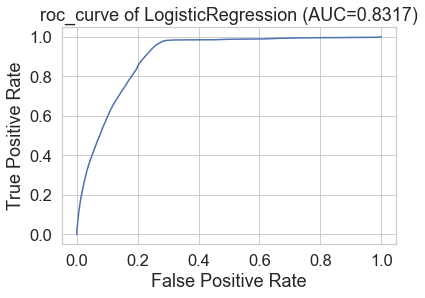

In [337]:
plt.plot(fpr, tpr) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_curve of LogisticRegression (AUC=%.4f)' %(auc))
plt.show()

In [338]:
# 10 least importance feature: 

In [334]:
y_pred_LR = LR.predict(test_df)
sub_base_LR = pd.DataFrame({'activity_id' : test_id, 'outcome': y_pred_LR})
sub_base_LR.to_csv('./submission/sub_base_LR.csv', index = False)

#### RamdomForestClassifier with feature importance (to do)

In [ ]:
# 10 least importance feature: 

#### XGBClassifier with feature importance

In [77]:
XGB = XGBClassifier()
XGB.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [88]:
y_prob_XGB = XGB.predict_proba(x_val)[:, 1]

In [99]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob_XGB)
auc = auc(fpr, tpr)
auc

0.934265459592414

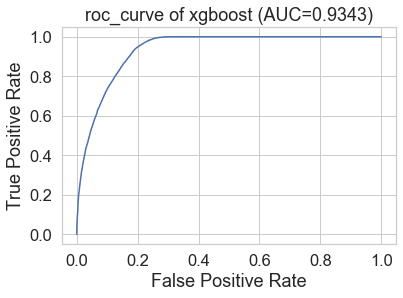

In [100]:
plt.plot(fpr, tpr) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_curve of xgboost (AUC=%.4f)' %(auc))
plt.show()

In [93]:
y_pred_XGB = XGB.predict(test_df)
sub_base_XGB = pd.DataFrame({'activity_id' : test_id, 'outcome': y_pred_XGB})
sub_base_XGB.to_csv('./submission/sub_base_XGB.csv', index = False)

In [90]:
importance = XGB.feature_importances_
importance_df = pd.DataFrame({'Importance':importance},index = X_train.columns)
importance_df = importance_df.sort_values(by='Importance', axis=0, ascending=False)
importance_df

,Importance
char_38,0.582277
char_2_y,0.058397
day_y,0.038795
group_1,0.038415
char_7_y,0.034999
char_6_y,0.032179
char_25,0.030246
char_10_y,0.022905
char_1_y,0.020815
char_30,0.020269


In [ ]:
# least importance feature: 

In [ ]:
# kaggle score of AUC: 0.85609

#### LinearSVC

In [101]:
LSVC = LinearSVC()
LSVC.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [208]:
y_prob_LSVC = LSVC._predict_proba_lr(x_val)[:, 1].astype(np.float32)

In [209]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob_LSVC)

In [210]:
auc = roc_auc_score(y_val, LSVC.predict(x_val))
auc

0.5960768528046266

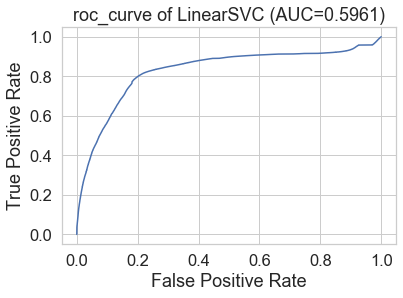

In [211]:
plt.plot(fpr, tpr) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_curve of LinearSVC (AUC=%.4f)' %(auc))
plt.show()

In [136]:
y_pred_LSVC = LSVC.predict(test_df)
sub_base_LSVC = pd.DataFrame({'activity_id' : test_id, 'outcome': y_pred_LSVC})
sub_base_LSVC.to_csv('./submission/sub_base_LSVC.csv', index = False)

In [146]:
# kaggle score of AUC: 0.60159

#### SGDClassifier (to do)

#### KNeighborsClassifier (to do)

#### DecisionTreeClassifier (to do)

#### Naive_bayes BernoulliNB (to do)

#### Perceptron (to do)

In [73]:
# choose 2 best-performing models from the above to apply the later improvement
# consider drop some unimportance features later

## Feature engineering

### Feature selection

##### using RFE

In [152]:
from sklearn.feature_selection import RFE

In [153]:
RFE_LR = RFE(estimator=LogisticRegression(), n_features_to_select=40).fit(X_train, Y_train)

In [170]:
RFE_LR.ranking_

array([16, 14, 12, 11, 17,  1,  9,  1,  1, 13,  5, 20,  1,  1, 18,  1,  1,
       19,  1,  1,  1,  1,  1,  4,  2,  6,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1, 10,  1,  1,  1,
        1,  1,  1,  1,  1,  3, 15,  8])

In [171]:
RFE_LR.support_

array([False, False, False, False, False,  True, False,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False])

In [172]:
test.columns

Index(['activity_id', 'activity_category', 'char_1_x', 'char_2_x', 'char_3_x',
       'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x',
       'char_10_x', 'year_x', 'month_x', 'day_x', 'isweekend_x', 'char_1_y',
       'group_1', 'char_2_y', 'char_3_y', 'char_4_y', 'char_5_y', 'char_6_y',
       'char_7_y', 'char_8_y', 'char_9_y', 'char_10_y', 'char_11', 'char_12',
       'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18',
       'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24',
       'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30',
       'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36',
       'char_37', 'char_38', 'year_y', 'month_y', 'day_y', 'isweekend_y'],
      dtype='object')

In [235]:
# construct dropping list which might be consider later
# combine with the previous observation that char_x features with too many missing values
# and char_10_x, group_1 features with too many classes

In [236]:
to_be_drop = ['char_1_x','char_2_x','char_3_x','char_4_x','char_5_x','char_6_x','char_7_x','char_8_x','char_9_x',
              'char_10_x','group_1']

##### using SelectKBest (fitting a XGBClassifier)

In [263]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [226]:
kbest = SelectKBest(f_classif)
pipeline = Pipeline([('kbest', kbest), ('xgb', XGBClassifier())])

In [243]:
gs_kbest = GridSearchCV(pipeline, {'kbest__k': [1,2,3,4]})
gs_kbest.fit(x_train , y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x1a2450c9e0>)),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                                                      max_depth=3,
 

In [244]:
gs_kbest.best_score_, gs_kbest.best_params_

(0.836912742514643, {'kbest__k': 4})

In [245]:
y_prob_kbest = gs_kbest.predict_proba(x_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob_kbest)

In [246]:
auc = roc_auc_score(y_val, gs_kbest.predict(x_val))
auc

0.8497999693677377

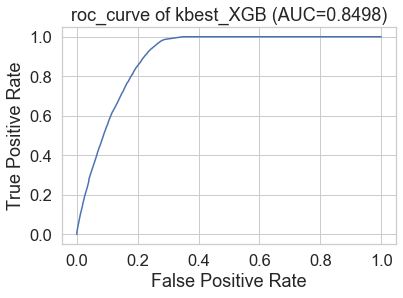

In [247]:
plt.plot(fpr, tpr) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_curve of kbest_XGB (AUC=%.4f)' %(auc))
plt.show()

In [249]:
y_pred_kbest = gs_kbest.predict(test_df)
sub_improve1_kbest = pd.DataFrame({'activity_id' : test_id, 'outcome': y_pred_kbest})
sub_improve1_kbest.to_csv('./submission/sub_improve_kbest_xgb.csv', index = False)

In [234]:
# kaggle score of AUC: 0.83069 
# no apparent improvement

### Feature scaling & encoding

In [264]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectFromModel

In [265]:
# nomarlize numeric feature 'char_38'

In [266]:
scaler = MinMaxScaler()

In [267]:
for df in [train_df, test_df]:
    df['char_38'] = scaler.fit_transform(np.array(df['char_38']).reshape(-1,1))

In [268]:
# from the above baseline modeling, we can conclude that XGboost performs best
# however, XGBoost doesn't explicitly handle categorical variablesHence, 
# which gives us the insight to convert them to numeric features, 
# for which One-Hot-Encoding and Label-Encoding are popularly used.

In [270]:
whole_df = pd.concat([X_train, test_df],ignore_index=True,sort=False)

In [271]:
objective_var=['group_1','activity_category','char_1_x','char_2_x','char_3_x','char_4_x','char_5_x','char_6_x',
               'char_7_x','char_8_x','char_9_x','char_10_x','char_1_y','char_2_y','char_3_y','char_4_y','char_5_y',
               'char_6_y','char_7_y','char_8_y','char_9_y']

In [272]:
# reduce dimension by replacing 0 with 999999 which was outside the range of all categorical variables

In [273]:
def reduce_dim(df, col, toreplace):
    for index,i in df[col].duplicated(keep=False).iteritems():
        if i==False:
            df.set_value(index,col,toreplace)
    return df

In [274]:
for var in objective_var:
    X_whole = reduce_dim(whole_df, var, 9999999)

In [275]:
X = X_whole[:len(train_df)]
X_test = X_whole[len(train_df):]

In [ ]:
# del act_train_df, act_test_df, ppl_df
# del train_df, test_df
# del whole_df, X_whole

In [276]:
# first LabelEncode on all the categorical features  
# after LabelEncode, it will be irrelevant the number picked for replacing the unique entries 
# as long as it falls outside the range of values each feature has.

In [277]:
# secondly, make feature matrix sparse with one hot encoding

In [278]:
le = LabelEncoder()
enc = OneHotEncoder(handle_unknown='ignore')

In [279]:
warnings.filterwarnings("ignore")
not_object = []
for var in X.columns:
    if var not in objective_var:
        not_object.append(var)
    else:
        temp = pd.concat([X[var],X_test[var]], sort=False)        
        le.fit(temp.values)
        X[var] = le.transform(X[var].values)
        X_test[var] = le.transform(X_test[var].values) 

In [280]:
enc = enc.fit(pd.concat([X[objective_var],X_test[objective_var]]))
X_obj_sparse = enc.transform(X[objective_var])
X_test_obj_sparse = enc.transform(X_test[objective_var])

In [281]:
X[not_object].shape, X[objective_var].shape, X_test[not_object].shape, X_test[objective_var].shape

((2197291, 38), (2197291, 21), (498687, 38), (498687, 21))

In [282]:
from scipy.sparse import hstack

X_sparse = hstack((X[not_object], X_obj_sparse))
X_test_sparse = hstack((X_test[not_object], X_test_obj_sparse))

In [283]:
X_sparse.shape, X_test_sparse.shape

((2197291, 37439), (498687, 37439))

## Modeling with sparse matrix

In [339]:
# choose the two best performed model RandomForestClassifier and XGBClassifier in baseline experiments 
# do the GridSearch and Cross alidation on the the winner between RandomForestClassifier and XGBClassifier

### RandomForestClassifier 

In [ ]:
RF_sparse = RandomForestClassifier()
RF_sparse.fit(X_sparse, Y_train)

In [ ]:
y_pred_sparse_RF = RF_sparse.predict(X_test_sparse)

In [ ]:
sub_sparse_RF = pd.DataFrame({'activity_id' : test_id, 'outcome': y_pred_sparse_RF})
sub_sparse_RF.to_csv('sub_sparse_RF.csv', index = False)

### XGBClassifier

#### Parameter tuning

First test

In [285]:
XGB1 = XGBClassifier(n_estimator=100, learning_rate=0.01)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [286]:
param_test1 = {'booster': ['gbtree', 'gblinear']}

In [287]:
gsearch1 = GridSearchCV(estimator = XGB1,param_grid = param_test1, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, verbose = 3, cv = kfold)

In [289]:
gsearch1.fit(X_sparse, Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  7.8min remaining: 18.1min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 15.4min remaining:  6.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 16.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimator=100,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'booster': ['gbtree',

In [292]:
gsearch1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=100,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [291]:
gsearch1.best_params_, gsearch1.best_score_

({'booster': 'gbtree'}, 0.9082647267392769)

Second test

In [294]:
XGB2 = XGBClassifier(**gsearch1.best_params_)

In [295]:
param_test2 = {'n_estimators':range(10,100,10),'learning_rate':[0.01,0.1,0.2]}

In [296]:
gsearch2 = GridSearchCV(estimator = XGB2,param_grid = param_test2, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, verbose = 3, cv = kfold)

In [297]:
gsearch2.fit(X_sparse, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 82.6min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 104.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': 

In [298]:
gsearch2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=90, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [299]:
gsearch2.best_params_, gsearch2.best_score_

({'learning_rate': 0.2, 'n_estimators': 90}, 0.9327248357621789)

Third test

In [304]:
XGB3 = XGB2.set_params(**gsearch2.best_params_)

In [309]:
param_test3 = {'max_depth': np.linspace(1, 10, 10, dtype=int), 'min_child_weight':range(1,6,2)}

In [310]:
gsearch3 = GridSearchCV(estimator = XGB3,param_grid = param_test3, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, verbose = 3, cv = kfold)

In [311]:
gsearch3.fit(X_sparse, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 168.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 254.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.2, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=90, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
               

In [314]:
gsearch3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=90, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [315]:
gsearch3.best_params_, gsearch3.best_score_

({'max_depth': 10, 'min_child_weight': 1}, 0.9628103720363622)

Fourth test

In [322]:
XGB4 = XGB3.set_params(**gsearch3.best_params_)

In [324]:
param_test4 = {'subsample': [0.5,0.6,0.7,0.8,0.9], 'colsample_bytree': [0.5,0.6,0.7,0.8,0.9]}

In [325]:
gsearch4 = GridSearchCV(estimator = XGB4,param_grid = param_test4, scoring = 'roc_auc',
                        n_jobs = -1, iid = False, verbose = 3, cv = kfold)

In [326]:
gsearch4.fit(X_sparse, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 291.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.2, max_delta_step=0,
                                     max_depth=10, min_child_weight=1,
                                     missing=None, n_estimators=90, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'sub

In [327]:
gsearch4.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=90, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [328]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.5, 'subsample': 0.9}, 0.9640236722411452)

#### Fit XGBClassifier with above parameters

In [316]:
XGB = XGBClassifier(n_estimators=90, learning_rate=0.2, max_depth=10, min_child_weight=1, gamma=0.3)
XGB.fit(X_sparse, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=90, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [317]:
y_pred_XGB1_sparse = XGB.predict(X_test_sparse)

In [340]:
sub_sparse_XGB1 = pd.DataFrame({'activity_id' : test_id, 'outcome': y_pred_XGB1_sparse})
sub_sparse_XGB1.to_csv('./submission/sub_sparse_XGB1.csv', index = False)

In [341]:
# kaggle score of AUC: 0.82165

#### Fit xgboost instead

###### booster = 'gbtree'

In [319]:
dtrain = xgb.DMatrix(X_sparse,label=Y_train)
dtest = xgb.DMatrix(X_test_sparse)

In [345]:
param_gbtree = {'max_depth':10, 'n_estimator':90, 'learning_rate':0.2, 'gamma':0.3, 'objective':'binary:logistic' }
param_gbtree['eval_metric'] = 'auc'
param_gbtree['subsample'] = 0.9
param_gbtree['colsample_bytree']= 0.5
param_gbtree['min_child_weight'] = 1
param_gbtree['booster'] = "gbtree"

In [360]:
evals  = [(dtrain,'train')]
num_round = 3000
bst = xgb.train(param_gbtree, dtrain, num_round, evals, early_stopping_rounds=10, verbose_eval=30)

[0]	train-auc:0.90388
Will train until train-auc hasn't improved in 10 rounds.
[10]	train-auc:0.941394
[20]	train-auc:0.947864
[30]	train-auc:0.951896
[40]	train-auc:0.954351
[50]	train-auc:0.95662
[60]	train-auc:0.958733
[70]	train-auc:0.96022
[80]	train-auc:0.961542
[90]	train-auc:0.963243
[100]	train-auc:0.964125
[110]	train-auc:0.965216
[120]	train-auc:0.966196
[130]	train-auc:0.967267
[140]	train-auc:0.968018
[150]	train-auc:0.968791
[160]	train-auc:0.969616
[170]	train-auc:0.970211
[180]	train-auc:0.971081
[190]	train-auc:0.971684
[200]	train-auc:0.972444
[210]	train-auc:0.972904
[220]	train-auc:0.973332
[230]	train-auc:0.973916
[240]	train-auc:0.974476
[250]	train-auc:0.974876
[260]	train-auc:0.975385
[270]	train-auc:0.975658
[280]	train-auc:0.976063
[290]	train-auc:0.976392
[300]	train-auc:0.976806
[310]	train-auc:0.97717
[320]	train-auc:0.97755
[330]	train-auc:0.977807
[340]	train-auc:0.978139
[350]	train-auc:0.978458
[360]	train-auc:0.978765
[370]	train-auc:0.979013
[380]	tra

In [361]:
y_pred_bst_gbtree = bst.predict(dtest)

In [362]:
sub_sparse_gbtree = pd.DataFrame({'activity_id' : test_id, 'outcome': y_pred_bst_gbtree})
sub_sparse_gbtree.to_csv('./submission/sub_sparse_gbtree.csv', index=False)

In [ ]:
# 0.94828

###### booster = 'gblinear'

In [355]:
param_gblinear = {'max_depth':9, 'n_estimator':90, 'learning_rate':0.2, 'gamma':0.3, 'objective':'binary:logistic'}
param_gblinear['eval_metric'] = 'auc'
param_gblinear['subsample'] = 0.5
param_gblinear['colsample_bytree']= 0.7
param_gblinear['min_child_weight'] = 1
param_gblinear['booster'] = "gblinear"

In [356]:
evals  = [(dtrain,'train')]
num_round = 1000
bst = xgb.train(param_gblinear, dtrain, num_round, evals, early_stopping_rounds=10, verbose_eval=10)

[0]	train-auc:0.966631
Will train until train-auc hasn't improved in 10 rounds.
[10]	train-auc:0.997264
[20]	train-auc:0.997521
[30]	train-auc:0.997574
[40]	train-auc:0.997592
[50]	train-auc:0.997599
[60]	train-auc:0.997602
[70]	train-auc:0.997604
[80]	train-auc:0.997605
[90]	train-auc:0.997606
[100]	train-auc:0.997607
Stopping. Best iteration:
[94]	train-auc:0.997607



In [358]:
y_pred_bst_gblinear = bst.predict(dtest)

In [359]:
sub_sparse_gblinear = pd.DataFrame({'activity_id' : test_id, 'outcome': y_pred_bst_gblinear})
sub_sparse_gblinear.to_csv('./submission/sub_sparse_gblinear.csv', index=False)

In [357]:
# kaggle score of AUC: 0.97896， which is our best model

In [406]:
param = {'max_depth':10, 'eta':0.02, 'silent':1, 'objective':'binary:logistic' }
# param['nthread'] = 4
param['eval_metric'] = 'auc'
param['subsample'] = 0.9
param['colsample_bytree']= 0.5
param['min_child_weight'] = 2
param['booster'] = "gblinear"